Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1070]:
NAME = "Jakub Warmuz"
COLLABORATORS = ""


# CS110 Fall 2019 - Assignment 3
# Decoding relationships between genes

## Submission Materials
Your assignment submission needs to include the following resources:

1. A PDF file must be the first resource and it will include all the answers to the questions above. 
2. Name the  PDF file: `<your_ name>.pdf`. For example, if you are a student name Dumbledore, your PDF file must be named “Dumbledore.pdf”. 
3. Make sure that you submit a neat, clearly presented, and easy-to-read PDF,  
4. Your PDF **must also** include the Python code as an appendix at the end. This will facilitate the process of writing feedback by anchoring the feedback to specific portions of the Python code using the grader tool.
5. Your second resource must be a single Python/Jupyter Notebook with your answers written in the assignment template provided.
    * Name this Jupyter Notebook also using the same convention as for the PDF file;  <student_name>.ipynb. For example, if you’re Dumbledore, your  Jupyter Notebook must be named “Dumbledore.ipynb”. 

## Notes on Grading Rubrics
* This is a strictly individual assignment. Everything you submit must reflect your own writing both in the text and Python programming.
* The assignment will be graded on the quality of your report, as well as: 
    * the LOs tagged in each question. 
    * the HCs **#professionalism** and **#algorithms** based on a holistic view of the assignment.

Please consult the rubrics for these LOs to optimally align your approach to the rubrics.
* As per the course’s policy on the syllabus, you will need to footnote at least **three** HCs by including a meaningful justification of the application of each HC. 
You will need to mindfully address how the HC enabled you to complete part of your work on this assignment. Please refer to refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work.
* You will receive a warning on the first two weak applications of the HCs used in assignments since the beginning of the course. The counting system is cumulative, and these first two warnings will not generate a grade on the HC. The third and subsequent warnings will be graded on the specific HC using the HCs corresponding rubric. Please check what your HC counter is and prepare accordingly for this assignment.


## Overview
Gene Mutation is a prevailing and computationally intensive research topic in Genetics. For this assignment, assume that you have been hired by a biotechnology company to work on a gene mutation research project, and your first task is to write a Python program to investigate a genealogical mutation sequencing.


In this program, a gene is described by a string of letters, with a letter being chosen from the set ${A, C, G, T}$. A mutation is relatively rare but it can occur in which there is a small probability of either inserting a new character, deleting an existing character, or changing to a new character randomly. We can refer to these probabilities by $p_i, p_d$, and $p_c$, respectively.


Now, suppose the starting point is a given string that undergoes a mutation process. This mutation created two other strings, the child strings of the first string. Each of these two new strings can undergo mutations by which they will change from their parent. In turn, the two-child strings, mutate and create 2 new substrings each, resulting in four grandchild strings from the original gene sequencing string. We can easily visualize the sequence of mutations if we were to draw a genealogy binary tree relating strings to their parent and grandparent strings.

As a result of these mutations, we now have 7 strings but unfortunately, the order of the strings has been lost due to a glitch in the gene sequencing generation program. Therefore, your first task in the project is to recover the genealogy tree for the following set of 7 strings labelled with lowercase letters:


`('a','ACAATCCTCGCGCAGAACAACACTTTTAACGTATCCTTGATCATTTTCCGTCCTAAGTCGAATT')`,
`('b','CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG')`,
`('c','TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT')`,
`('d','AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA')`,
`('e','GCGTCCGCAACGTTGGGCTTCAAACGTACCGAGTTTCCGATGGATTATATTGGACAGATGATCCTACCAAGTGCCTTTTCTAACAGCTCGGTAATGTC')`,
`('f','ACAGACTGCGGAAGCGCGACGCTTGATTTCGGCAGCCCCACGGATGGTACATAACTGCTGTTACCTACGCTACCTGCTAAACACTTCCCGCTCTG')`,
`('g','ACGAGCAGCCACAGCACACCGTTAACTATGTGATAATCCCTCATGCGATG')`

Henceforth, the set of strings created with the gene-sequencing generation program will be referred to as `Set_Strings`.

# Assignment Questions

Each of the questions below will be graded on the CS110 LOs included inside square brackets: 

## Part A [#responsibility] [appropriate LO for the make-up work] 

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to session 12.2 (inclusively).

Submit this screenshot as a PNG file on your Python or Jupyter notebook. 


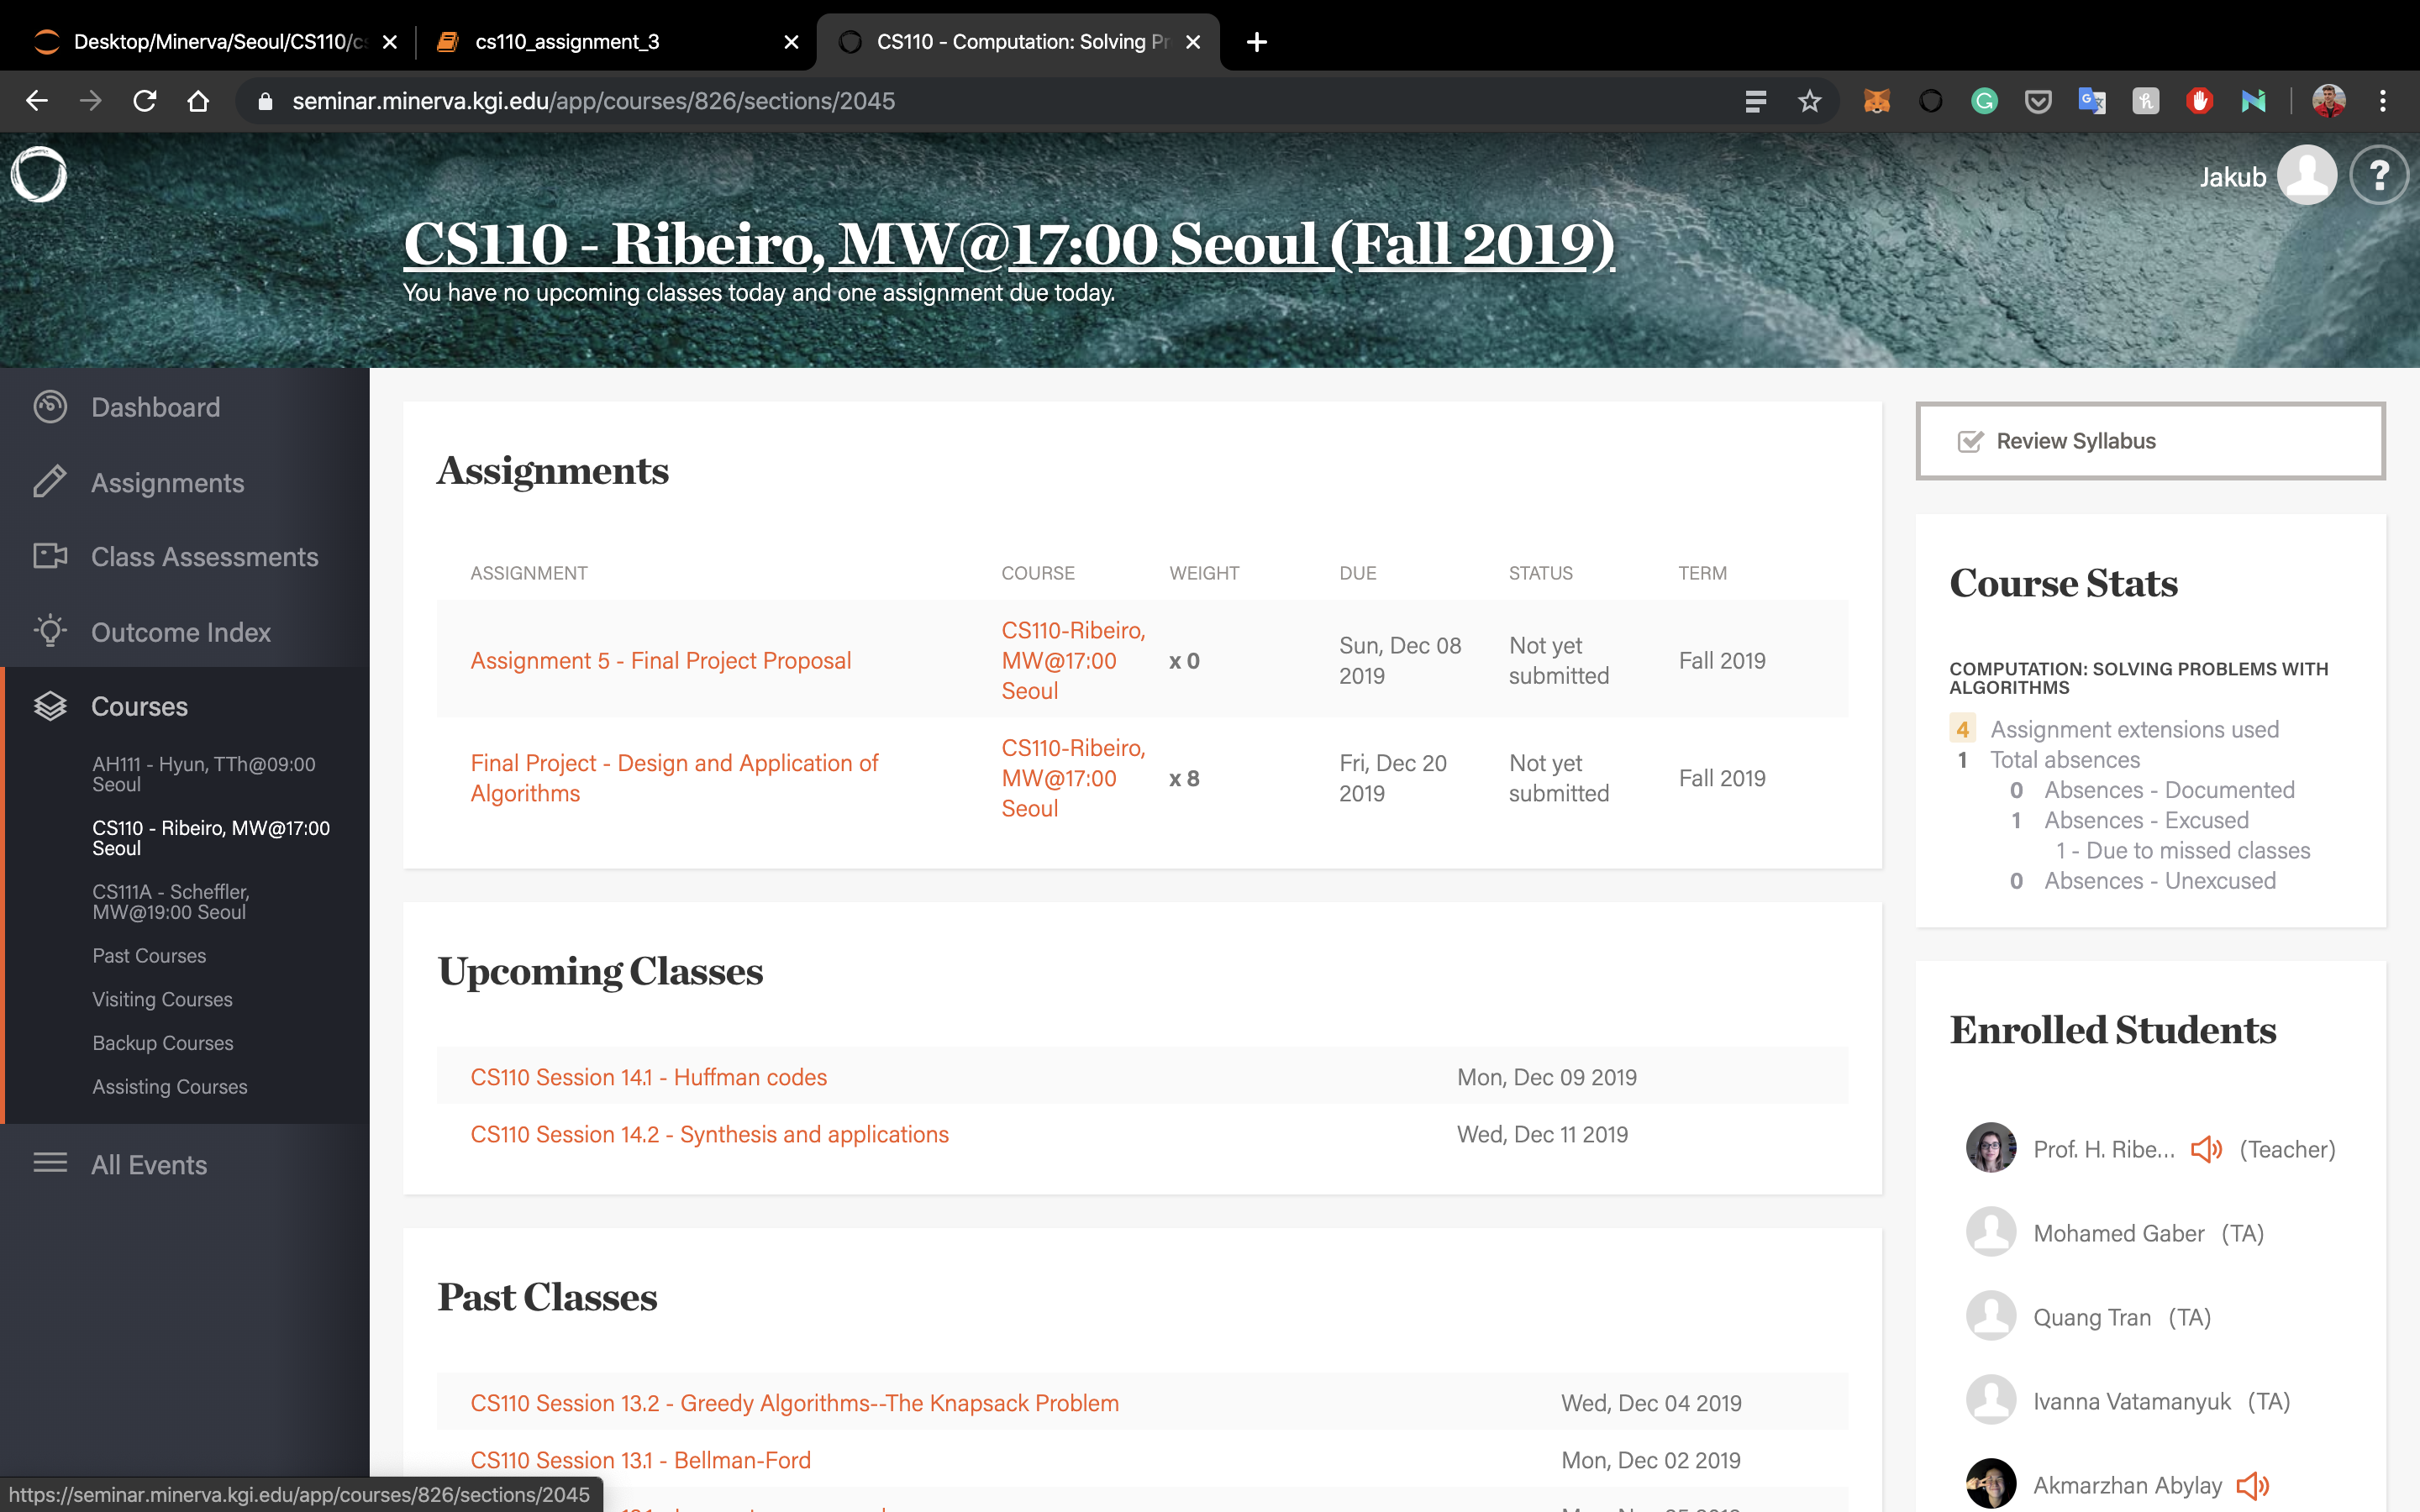

In [1071]:
from IPython.display import Image
Image("screenshot.png")

## Part B. Consider `Set_Strings` to answer the following questions below:

### Question 1. [#DynamicProgramming, #PythonProgramming, #CodeReadability] 

Write Python code which, given any two arbitrary strings, outputs the length of the Longest Common Subsequence (LCS) for those two strings. Make sure to include a number of test cases that demonstrate that your code is correct.


In [1072]:
import numpy as np
def longestCommonSubsequence(x, y):
    """
    Gives the length of the longest common substring between strings x and y
    
    Inputs:
    - x, y: strings
    """
    #Copied from the pre-class work
    m = len(x)       
    n = len(y)
    
    b = [[0 for i in range(n)] for j in range(m)]
    c = [[0 for i in range(n+1)] for j in range(m+1)]
    
    for i in range(1,m+1):
        for j in range(1,n+1):   
            if x[i-1] == y[j-1]:
                c[i][j] = c[i-1][j-1]+1
                b[i-1][j-1] = "NW"
            elif c[i-1][j] >= c[i][j-1]:
                c[i][j] = c[i-1][j]
                b[i-1][j-1] = "N"
            else:
                c[i][j] = c[i][j-1]
                b[i-1][j-1] = "W"
    return c[m][n]

In [1104]:
#Test cases
#"QWERTY"=6
assert(longestCommonSubsequence('QdWdEfRrTkoY', 'xbQnmWvnEcbRcbTmbY')==6) 
#Elements in a reverse order hence LCS = only 1
assert(longestCommonSubsequence('poiuytrewq', 'qwertyuiop')==1) 
#The code distinguishes between capital and small letters
assert(longestCommonSubsequence('qqq', 'QQQ')==0) 

In [1105]:
assert(longestCommonSubsequence('ABCBDAB', 'BDCABA')==4)

### Question 2. [#DynamicProgramming] 

How many LCSs are there in Set_Strings? Generate the matrix of the lengths of the LCS for every pair of strings in Set_Strings. The matrix should be cast as a two-dimensional numpy array. **Store this 2D numpy array to a variable named `C`**.

Your 2D array `C` should have dimension (7,7) and `C[i,j]` should give the length of the LCS for the $i-$th and $j-$th strings. For example, `C[0,3]` gives the length of the LCS for string `a` and string `d`.

In [1106]:
import numpy as np
Set_Strings=('a','ACAATCCTCGCGCAGAACAACACTTTTAACGTATCCTTGATCATTTTCCGTCCTAAGTCGAATT'), ('b','CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG'), ('c','TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT'), ('d','AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA'), ('e','GCGTCCGCAACGTTGGGCTTCAAACGTACCGAGTTTCCGATGGATTATATTGGACAGATGATCCTACCAAGTGCCTTTTCTAACAGCTCGGTAATGTC'), ('f','ACAGACTGCGGAAGCGCGACGCTTGATTTCGGCAGCCCCACGGATGGTACATAACTGCTGTTACCTACGCTACCTGCTAAACACTTCCCGCTCTG'), ('g','ACGAGCAGCCACAGCACACCGTTAACTATGTGATAATCCCTCATGCGATG')
def matrix_generator(strings):
    global c
    c=[]
    for i in range(len(strings)):
        row=[]
        for j in range(len(strings)):
            row.append(longestCommonSubsequence(
                Set_Strings[i][1], Set_Strings[j][1]))
        c.append(row)
    c=np.array(c,dtype=float)
    return c    
print(c)
print(c.shape)

[[64. 45. 49. 48. 50. 48. 38.]
 [45. 74. 47. 46. 59. 58. 45.]
 [49. 47. 81. 48. 57. 57. 39.]
 [48. 46. 48. 75. 53. 54. 38.]
 [50. 59. 57. 53. 98. 61. 43.]
 [48. 58. 57. 54. 61. 95. 45.]
 [38. 45. 39. 38. 43. 45. 50.]]
(7, 7)


In [1076]:
#Making sure the code works
print('a is: ', Set_Strings[0][1])
print('d is: ', Set_Strings[3][1])
print('Longest Common Subsequence of a and d is: ', longestCommonSubsequence(Set_Strings[0][1],Set_Strings[3][1]))
print('Using our c array, LCS of a and d is: ', matrix_generator(Set_Strings)[0][3])

a is:  ACAATCCTCGCGCAGAACAACACTTTTAACGTATCCTTGATCATTTTCCGTCCTAAGTCGAATT
d is:  AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA
Longest Common Subsequence of a and d is:  48
Using our c array, LCS of a and d is:  48.0


In [1077]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Question 3. [#DataStructures]

Manually examine the matrix you obtained in 2, and infer the genealogical relationships between strings (i.e., explicitly identify the great-grandparent, grandparent, parent and child strings), and draw the resulting genealogy binary tree associated with `Set_Strings`.


In [1109]:
from math import log
#Function that gives us the weighted matrix. 
#The weights are calculated with the following formula: 
#weighted_lcs=(LCS/(length_1+length_1))/log(abs(length_1-length_2)), 
#where length_1 and length_2 refer to the lengths of 2 sequences
#that we are considering the LCS for
def get_weighted_lcs(matrix):
    global weighted_lcs_matrix
    weighted_lcs_matrix=matrix.copy()
    #running double loop to access each element from the matrix
    for i in range(weighted_lcs_matrix.shape[0]):
        for j in range(weighted_lcs_matrix.shape[0]):
            #handling the case of self-lcs (length of the sequence)
            if i==j:
                weighted_lcs_matrix[i][j]=0
            #handling the case when we have log(1) resulting in division by 0    
            elif abs(matrix[i][i]-matrix[j][j])==1:
                weighted_lcs_matrix[i][j]=(matrix[i][j]/(matrix[i][i]+matrix[j][j]))/log(abs(matrix[i][i]-matrix[j][j])+1)
            else: 
                weighted_lcs_matrix[i][j]=(matrix[i][j]/(matrix[i][i]+matrix[j][j]))/log(abs(matrix[i][i]-matrix[j][j]))
    return weighted_lcs_matrix


weighted=get_weighted_lcs(c).copy()
#Our root will be the sequence that has the biggest sum of weighted LCS 
#ratios with each other sequence
great_grand_parent=np.argmax(np.sum(weighted, axis=0))
#After using a sequence in our tree, we will mark all of the weighted 
#ratios for this sequence's 
#column as 0 so that no sequence gets used more than once
weighted[:,great_grand_parent]=0 
print('Great-grand-parent is:', Set_Strings[great_grand_parent][0], 'its index is:', great_grand_parent)
print('------------')
#a child to a parent will be the sequence that has the highest 
#weighted LCS with the parent
left_grandparent=np.argmax(weighted[great_grand_parent])
weighted[:,left_grandparent]=0
right_grandparent=np.argmax(weighted[great_grand_parent])
weighted[:,right_grandparent]=0
print('Parent 1 is:', Set_Strings[left_grandparent][0], 'its index is:', left_grandparent)
print('Parent 2 is:', Set_Strings[right_grandparent][0], 'its index is:', right_grandparent)
print('------------')
left_child=np.argmax(weighted[left_grandparent])
weighted[:,left_child]=0
right_child=np.argmax(weighted[left_grandparent])
weighted[:,right_child]=0
print("Parent 1's child 1 is:",  Set_Strings[left_child][0], 'its index is:', left_child)
print("Parent 1's child 2 is:",  Set_Strings[right_child][0], 'its index is:', right_child)
left_child=np.argmax(weighted[right_grandparent])
weighted[:,left_child]=0
right_child=np.argmax(weighted[right_grandparent])
weighted[:,right_child]=0
print("Parent 2's child 1 is:",  Set_Strings[left_child][0], 'its index is:', left_child)
print("Parent 2's child 2 is:",  Set_Strings[right_child][0], 'its index is:', right_child)

Great-grand-parent is: b its index is: 1
------------
Parent 1 is: d its index is: 3
Parent 2 is: c its index is: 2
------------
Parent 1's child 1 is: a its index is: 0
Parent 1's child 2 is: f its index is: 5
Parent 2's child 1 is: e its index is: 4
Parent 2's child 2 is: g its index is: 6


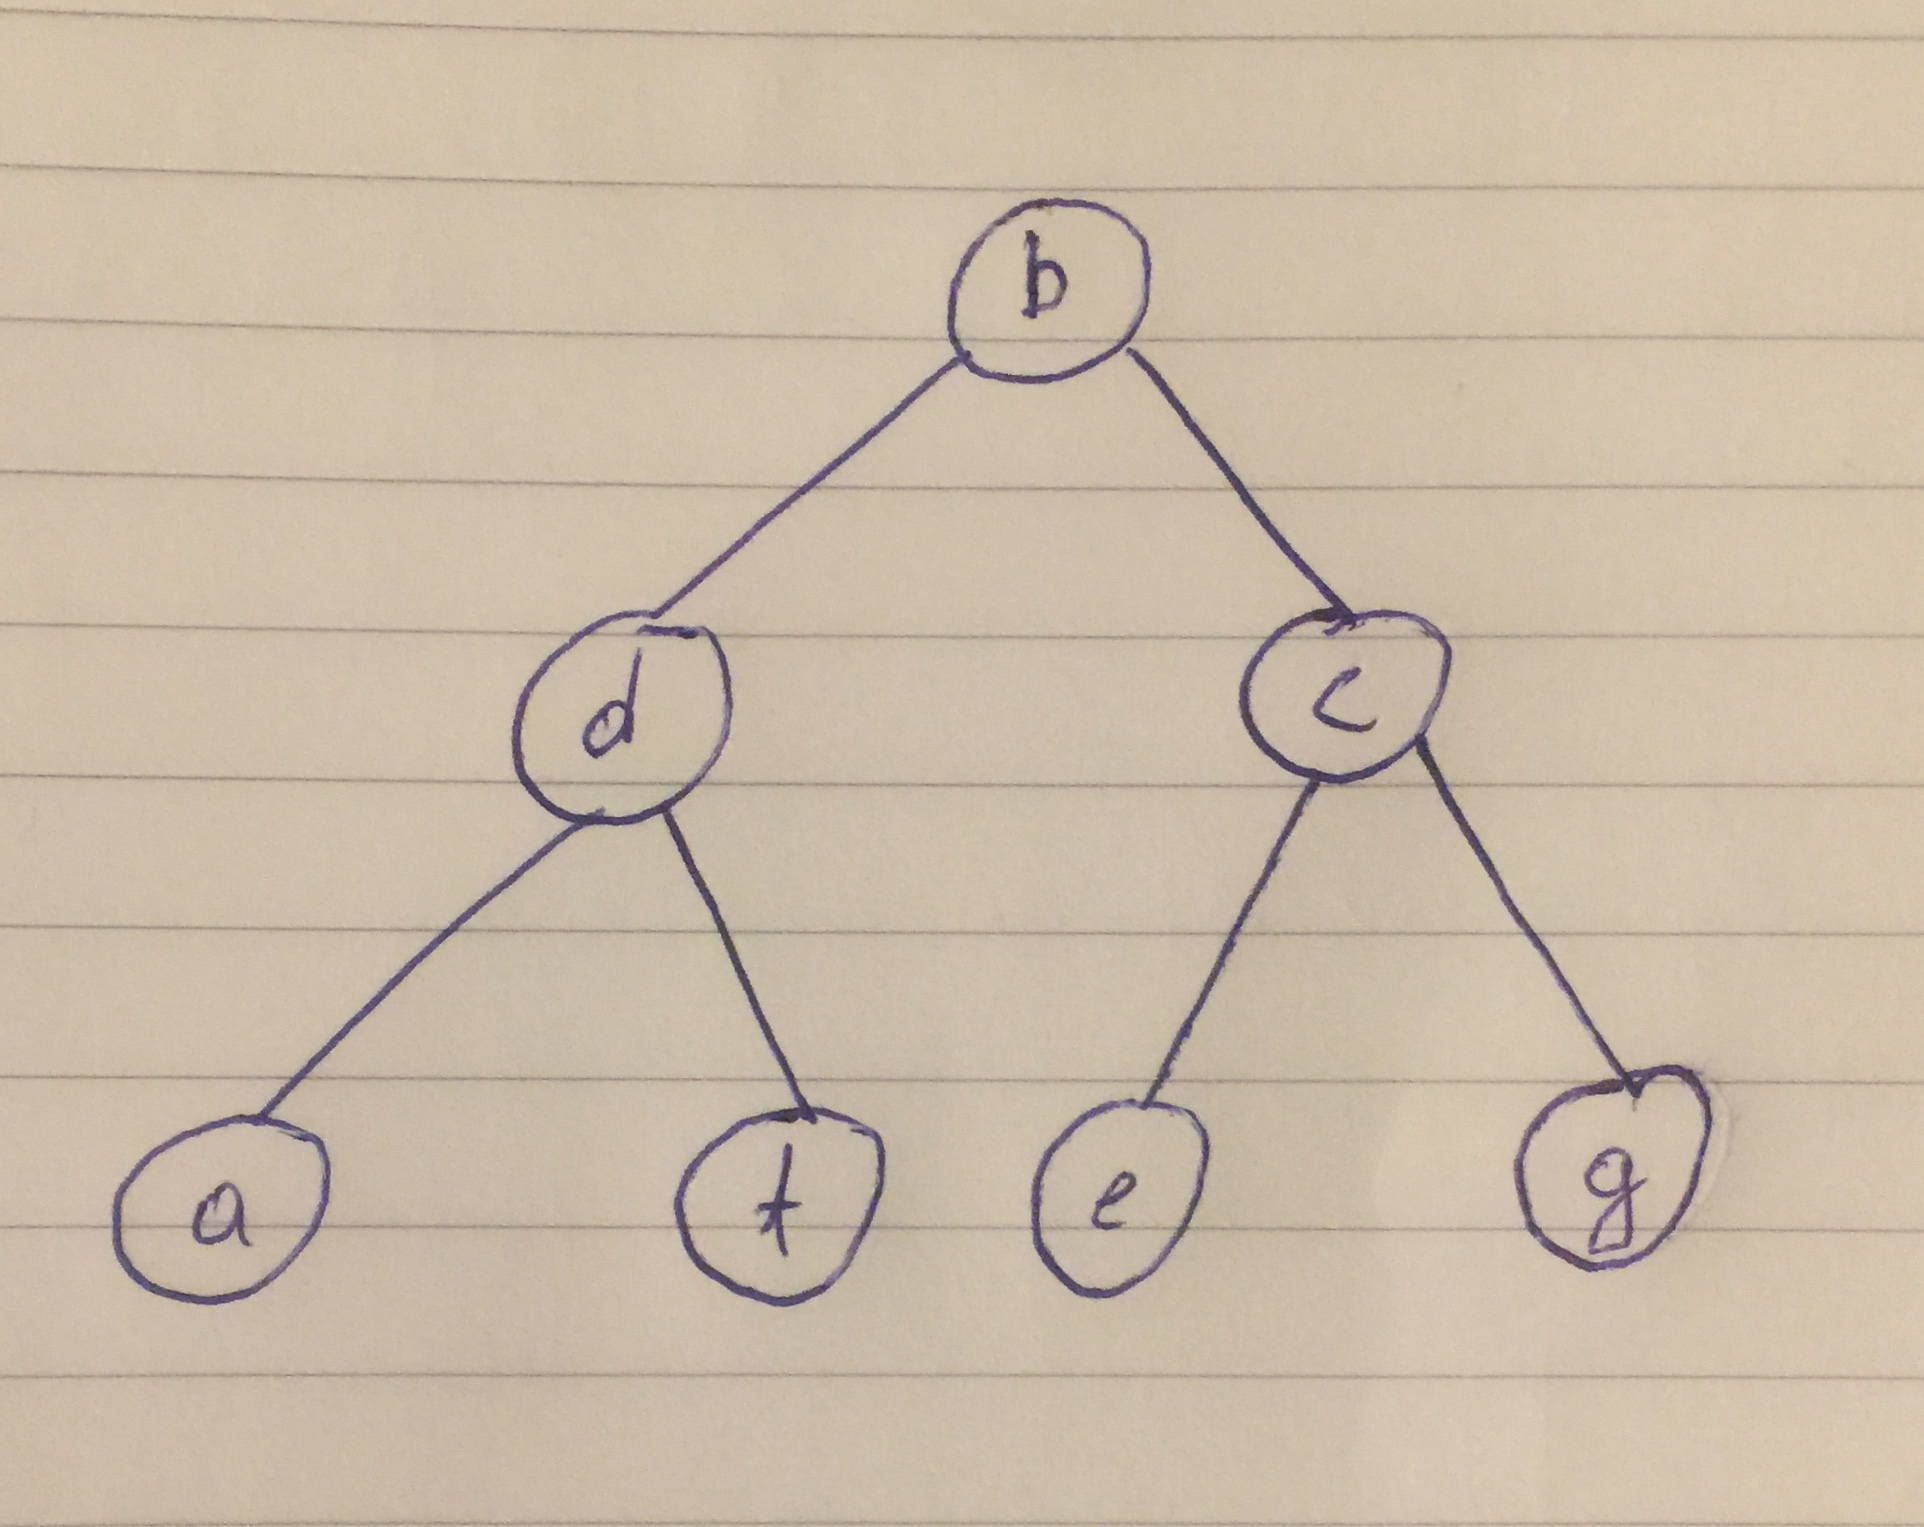

In [1098]:
from IPython.display import Image
Image("binary_tree.jpg")

### Question 4. [#PythonProgramming, #CodeReadability, #DynamicProgramming or #GreedyAlgorithms] 

Write an algorithm in Python for the general case, which takes as input $N$ sequencing strings and outputs a genealogy binary tree associated with the $N$ strings that best exposes the relationships between them.

To obtain the parent-child relations of gene sequences and draw the binary tree visualization, we will take the following steps:
- convert the set of sequences and their names into node types so that storing of the information is easy
- obtain the weighted LCS matrix using the function from the previous question
- find the root of the tree, which will be equivalent to the node that has the greatest sum of of weighted LCSs with all the other nodes (sequences)
- find the relations. In this step, we will use a greedy-algorithm approach using recursive calls. The idea is that if at each step we choose the children that are the most similar to the parent, we will obtain the closest approximation of genealogy to the truth. Hence, we will look for the sequence that has the biggest weighted LCS with its parent node. After finding it, we will set all the LCS values in the child node's corresponding column to 0. It is because we don't want this node to be used ever again as some other node's child. We will also store the index of the gene in a list which will later on be used for binary tree visualization. After that, we will recursively call the function on both left and right child. To avoid a loop in which the function would only calculate the left child, which would happen if we simply called the function on left and right child, one after the other, we will use queues. They will allow us adding left child's index, then right child's, and finally by popping the first element from the queue, we will call the function on the desirable node. Hence, the flowing of the code will be in the following way: find_children(root) -> find_children(root.left_child) -> find_children(root.right_child) -> find_children(root.left_child.left_child) -> find_children(root.left_child.right_child) -> find_children(root.right_child.left_child) ->  find_children(root.right_child.right_child)
- visualize the tree from the created, ordered list, using binarytree library. We will use the breadth-first binary tree algorithm.

In [1099]:
import sys
!conda install --yes --prefix {sys.prefix} binarytree

Solving environment: done

# All requested packages already installed.



In [1102]:
from collections import deque
from binarytree import tree

class Node: #defining the Node class with name of the sequence and sequence properties
    def __init__(self, seq_name, seq):
        self.parent = None
        self.l_child = None
        self.r_child = None
        self.sequence = seq
        self.name = seq_name
            
    
#creating the weighted LCS matrix based on the function we used previously             
def get_weighted_lcs_matrix(matrix):
    global weighted_matrix
    weighted_matrix=matrix.copy()
    #running double loop to access each element from the matrix
    for i in range(weighted_matrix.shape[0]):
        for j in range(weighted_matrix.shape[0]):
            #handling the case of self-lcs (length of the sequence)
            if i==j:
                weighted_matrix[i][j]=0
            #handling the case when we have log(1) resulting in division by 0    
            elif abs(matrix[i][i]-matrix[j][j])==1:
                weighted_matrix[i][j]=(matrix[i][j]/(matrix[i][i]+matrix[j][j]))/log(abs(matrix[i][i]-matrix[j][j])+1)
            else: 
                weighted_matrix[i][j]=(matrix[i][j]/(matrix[i][i]+matrix[j][j]))/log(abs(matrix[i][i]-matrix[j][j]))
    return weighted_matrix

#Defining the function that returns the index of the root
#Our root will be the sequence that has the biggest sum of weighted LCS 
#ratios with each other sequence
index_list=[]
def get_root(matrix):
    global root
    root=np.argmax(np.sum(matrix, axis=1)) 
    #after getting the parent node, we set all its weighted 
    #LCSs ratios to 0 because we will not want to consider 
    #this sequence again when constructing our tree
    matrix[root]=0
    #appending the index of the root to our list
    index_list.append(root)
    return root

#defining the function that finds the dependencies 
#(parent, l.child, r.child relations for each node in the set of sequences)
#The function takes matrix and the parent node as the arguments
def find_dependencies(matrix, node):
    #we will be executing function as long as there are any other nodes 
    #to be categorized left when we finish finding depndencies of all the 
    #nodes, our array will be a zero matrix, hence its sum will be ==0
    while sum(sum(matrix))!=0:
        #finding the gene with the greates LCS
        left_child=np.argmax(matrix, axis=0)[node]
        #appending it to the list of indices
        index_list.append(left_child)
        #setting the dependencies
        set_sequences[node].l_child=left_child
        set_sequences[left_child].parent=node
        #setting all the LCSs in the left_child's column to 0
        matrix[left_child]=0
        #repeating the same steps for right child
        right_child=np.argmax(matrix, axis=0)[node]
        index_list.append(right_child)
        set_sequences[node].l_child=right_child
        set_sequences[right_child].parent=node
        matrix[right_child]=0
#creating the order in which the function is recuresively called using python queues
        q.append(left_child) #adding the left child to the queue
        q.append(right_child) #adding the right child to the queue
        if q: #if the queue is not empty 
              #(meaning there are still some genes to be taken care of)
            #call the function on the first node from the queue
            find_dependencies(matrix, q.popleft()) 
        else:
            break
    
#defining the function that takes a list of genes 
#(lists with 2 elements: name and sequence) and turns them 
#into instance of Node class
def create_sequences(Set_Strings):
    global set_sequences
    set_sequences=[]
    for i in range(len(Set_Strings)):
        set_sequences.append(Node(seq_name=Set_Strings[i][0], seq=Set_Strings[i][1]))
    return set_sequences

#defining a function that generates an LCS matrix from the list of Node instances
def matrix_generator(sequences):
        global c
        c=[]
        for i in range(len(sequences)):
            row=[]
            for j in range(len(sequences)):
                row.append(longestCommonSubsequence(sequences[i].sequence, sequences[j].sequence))
            c.append(row)
        c=np.array(c,dtype=float)
        return c

In [1103]:
#To check our algorithm, let's call it on the Set_Strings 
#that we used in the previous question
#To make things easier to use in the future, we will define a function for
#calculating the relationships and visualizing the tree
from binarytree import build
def visualize_tree(set_of_gene_sequences):
    genes=create_sequences(set_of_gene_sequences)
    c=matrix_generator(genes)
    weighted_lcs_matrix=get_weighted_lcs_matrix(c)
    root=get_root(weighted_lcs_matrix)
    find_dependencies(weighted_lcs_matrix,root)
    tree=build(index_list)
    print(tree)
    
visualize_tree(Set_Strings)


    __1__
   /     \
  3       2
 / \     / \
0   5   4   6



The tree is exactly the same as what we obtained in the previous question, hence proving that the algorithm works as intended. Below is the output from the previosu question for the reference

- Great-grand-parent is: b its index is: 1
- 
- Parent 1 is: d its index is: 3
- Parent 2 is: c its index is: 2
- 
- Parent 1's child 1 is: a its index is: 0
- Parent 1's child 2 is: f its index is: 5
- Parent 2's child 1 is: e its index is: 4
- Parent 2's child 2 is: g its index is: 6

### Question 5. [#ComputationalCritique] 

Write any strengths or weaknesses of your suggested algorithm.


One definite weakness of my algorithm is that the output includes indices of the genes rather than their names. This weakness could be overcome by creasting a new library or altering the one I was working with. The other weakness is the long time it takes to create the matrices, which requires running two loops. On the contrary, the functions of finding the root and defining other dependencies are relatively fast. Also, the algorithm is generalizable to other sets of genes not only the one that was used in this assignment.

### Question 6. [#ComplexityAnalysis] 

What is the computational complexity of your solution to produce genealogy binary trees? You can consider M to be the length of a gene, and N the number of genes.

To analyze the time complexity of the algorithm, let's start with analyzing each function. Finding the longest common subsequence takes $\Theta(mn)$ time complexity, as we could see during the 12.1 session and as stated in Cormen et al. Our function that creates the matrix of weighted LCSs runs a double loop, both of lengths $n$ and at each iteration calls the LCS function. Hence, we will have $mnn^2 = mn^3$ operations, which is rather poor performance. Next, our find_dependencies function runs in a good $\Theta(n)$ time, since it checks the dependencies for each node once. The same goes for our get_root function, which takes a sum twice, leaving us with $\Theta(n)$ complexity. The rest of the functions, which are creating the instances of Node class and building a tree take $O(1)$ running time. Finally, we have $\Theta(mn) + $ $\Theta(mn^3) + $ $\Theta(n) + $ $\Theta(n) + $ $O(1) = $ $\Theta(mn^3)$

### Question 7. [#ComputationalSolutions, #PythonProgramming, #CodeReadability] 

How would you estimate the probabilities of insertions, deletions, and mutations, $p_i, p_d,$ and $p_c$, respectively? (Hint: It is obvious that you don’t have enough data to obtain meaningful estimates for large datasets, but this small dataset has enough information for you to intuitively formulate estimates for $p_i, p_d,$ and $p_c$.). Make sure you include a working Python estimation that would take your algorithmic strategy into practice.

For the purpose of this question, we will make a use of another concept which is similar in structure to the Longest Common Subsequence problem: edited distance. The task of the edited distance algorithm is to determine how many transformations a string 'a' had to go through to get transformed into a string 'b'. We allow 3 types of transformations: insertions, deletions, and mutations. This problem reflects the optimal subproblem sturcture and we will be able to use dynamic programming. We can construct a matrix, just as in case of LCS and we will keep on comparing how many transformations have to be done while updating the values in a matrix until it is full, after which we will obtain the edit distance from the bottom right corner cell of the matrix. To understand how our algorithm makes decision of which of the operations is the modst optimal, suppose we are considering the case when matrix[2][3]. We are comparing the values at matrix[2][2], matrix[1][3], and matrix[1][2], which correspond to insertion, deletion, and mutation respectively. We want to choose the transformation that minimizes the total number of transformations needed (hence, the smallest of all these 3). It is because the matrix correspondsd to our two string of interest on the 2 axes.

In [1083]:
def edit_distance(sequence1, sequence2): 
    m=len(sequence1)
    n=len(sequence2)
    #Matrix to store the results of subproblems just like in LCS
    results = [[0 for x in range(n+1)] for x in range(m+1)] 
      
    #running a double loop to iterate through all the rows and columns
    for i in range(m+1): 
        for j in range(n+1): 

            # If last characters are same, we don't need any alterations
            #hence, we will iterate for the previous character (n-1, m-1)
            if sequence1[i-1] == sequence2[j-1]: 
                results[i][j] = results[i-1][j-1] 

            #if characters are not the same, we have 3 options:
            #insertion, deletion, or mutation
            #we check for all of them and return the minimum option
            #i.e. the one that requires the least changes
            else: 
                results[i][j] = 1 + min(results[i][j-1], results[i-1][j], results[i-1][j-1]) 
    
    return results[m][n]

In [1084]:
#defining the function that calculaters the probabilites of any of the 
#three operations at each character
def probabilities(sequence1, sequence2): 
    insertion=0
    deletion=0
    mutation=0
    m=len(sequence1)
    n=len(sequence2)
    #Matrix to store the results of subproblems just like in LCS
    results = [[0 for x in range(n+1)] for x in range(m+1)] 
      
    #running a double loop to iterate through all the rows and columns
    for i in range(m+1): 
        for j in range(n+1): 

            # If last characters are same, we don't need any alterations
            #hence, we will iterate for the previous character (n-1, m-1)
            if sequence1[i-1] == sequence2[j-1]: 
                results[i][j] = results[i-1][j-1] 

            #here, we use the 3 options we had from the code for edit_dist
            #each if statement handles different case
            else: 
                #insertion
                if min(results[i][j-1], results[i-1][j], results[i-1][j-1])==results[i][j-1]:
                    insertion+=1
                #deletion
                elif min(results[i][j-1], results[i-1][j], results[i-1][j-1])==results[i-1][j]:
                    deletion+=1
                #mutation
                else:
                    mutation+=1
                #regular operation to traverse through the matrix
                results[i][j] = 1 + min(results[i][j-1], results[i-1][j], results[i-1][j-1]) 
            
    #dividing the values by the multiplication of lengths of 2 strings
    #this will give us the probability of certain operation happening at each character
    return insertion/(n*m), deletion/(n*m), mutation/(n*m)

In [1085]:
#defining the value holders
insert_prob=0
delete_prob=0
mutate_prob=0
#running a loop over each parent-child relation
for i in range(1,len(set_sequences)):
    #if the gene does have a parent (i.e. if not root)
    if set_sequences[i].parent:
        #calling the probablities function on parent and child
        probs=probabilities(set_sequences[set_sequences[i].parent].sequence,set_sequences[i].sequence)
        #updating values
        insert_prob+=probs[0]
        delete_prob+=probs[1]
        mutate_prob+=probs[2]

#dividing the values by the number of elements to obtain the average
#num of elements is -1 because we didn't calculate for the root
insert_prob=insert_prob/(len(set_sequences)-1)
delete_prob=delete_prob/(len(set_sequences)-1)
mutate_prob=mutate_prob/(len(set_sequences)-1)

print('Probability of insertion at each character of a parent:', insert_prob)
print('Probability of deletion at each character of a parent:', delete_prob)
print('Probability of mutation at each character of a parent:', mutate_prob)

Probability of insertion at each character of a parent: 0.31995508369092335
Probability of deletion at each character of a parent: 0.22661875574106152
Probability of mutation at each character of a parent: 0.09584135619089672


------------

After designing the answer to the previous question, I realized that edit distance could also be used for the previous problems. Below, I will implement this idea in analogical way as with the use of weighted LCS. This time, however, instead of choosing a gene with the greatest LCS, we will be selecting the one with the smallest edit distance.

In [1086]:
#creating the matrix of edited distances between all the genes
def edit_dist_matrix(strings):
    global edited
    edited=[]
    for i in range(len(strings)):
        row=[]
        for j in range(len(strings)):
            #handling self-distance
            if i==j:
                row.append(float('inf'))
            else:
                row.append(edit_distance(Set_Strings[i][1], Set_Strings[j][1]))
        edited.append(row)
    edited=np.array(edited,dtype=float)
    return edited
edit_dist_matrix(Set_Strings)

array([[inf, 29., 33., 31., 32., 34., 24.],
       [29., inf, 37., 34., 38., 37., 28.],
       [33., 38., inf, 41., 43., 45., 28.],
       [32., 36., 40., inf, 40., 39., 28.],
       [33., 40., 45., 40., inf, 49., 27.],
       [35., 37., 45., 39., 49., inf, 25.],
       [24., 27., 28., 26., 26., 25., inf]])

In [1087]:
def edit_dist_matrix(strings):
    global edited
    edited=[]
    for i in range(len(strings)):
        row=[]
        for j in range(len(strings)):
            if i==j:
                row.append(float('inf'))
            else:
                row.append(edit_distance(Set_Strings[i][1], Set_Strings[j][1]))
        edited.append(row)
    edited=np.array(edited,dtype=float)
    return edited


dist_matrix=edit_dist_matrix(Set_Strings).copy()
#Our root will be the sequence that has the smallest edited distance with each other sequence
great_grand_parent=np.argmin(np.sum(dist_matrix, axis=0))
#After using a sequence in our tree, we will mark all of the weighted ratios for this sequence's 
#column as infinity so that no sequence gets used more than once
dist_matrix[:,great_grand_parent]=float('inf') 
print('Great-grand-parent is:', Set_Strings[great_grand_parent][0], 'its index is:', great_grand_parent)
print('------------')
#a child to a parent will be the sequence that has the smallest edited distance from the parent
left_grandparent=np.argmin(dist_matrix[great_grand_parent])
dist_matrix[:,left_grandparent]=float('inf') 
right_grandparent=np.argmin(dist_matrix[great_grand_parent])
dist_matrix[:,right_grandparent]=float('inf') 
print('Parent 1 is:', Set_Strings[left_grandparent][0], 'its index is:', left_grandparent)
print('Parent 2 is:', Set_Strings[right_grandparent][0], 'its index is:', right_grandparent)
print('------------')
left_child=np.argmin(dist_matrix[left_grandparent])
dist_matrix[:,left_child]=float('inf') 
right_child=np.argmin(dist_matrix[left_grandparent])
dist_matrix[:,right_child]=float('inf') 
print("Parent 1's child 1 is:",  Set_Strings[left_child][0], 'its index is:', left_child)
print("Parent 1's child 2 is:",  Set_Strings[right_child][0], 'its index is:', right_child)
left_child=np.argmin(dist_matrix[right_grandparent])
dist_matrix[:,left_child]=float('inf') 
right_child=np.argmin(dist_matrix[right_grandparent])
dist_matrix[:,right_child]=float('inf') 
print("Parent 2's child 1 is:",  Set_Strings[left_child][0], 'its index is:', left_child)
print("Parent 2's child 2 is:",  Set_Strings[right_child][0], 'its index is:', right_child)

Great-grand-parent is: a its index is: 0
------------
Parent 1 is: g its index is: 6
Parent 2 is: b its index is: 1
------------
Parent 1's child 1 is: f its index is: 5
Parent 1's child 2 is: d its index is: 3
Parent 2's child 1 is: c its index is: 2
Parent 2's child 2 is: e its index is: 4


In [1090]:
class Node: #defining the Node class with name of the sequence and sequence properties
    def __init__(self, seq_name, seq):
        self.parent = None
        self.l_child = None
        self.r_child = None
        self.sequence = seq
        self.name = seq_name

#Defining the function that returns the index of the root
#Our root will be the sequence that has the biggest sum of weighted LCS ratios with each other sequence
index_list2=[]
def get_root(matrix):
    global root2
    root2=np.argmin(np.sum(matrix, axis=0)) 
    #after getting the parent node, we set all its weighted LCSs ratios to 0 
    #because we will not want to consider this sequence again when constructing our tree
    matrix[root2]=0
    return root2

#defining the function that finds the dependencies 
#(parent, l.child, r.child relations for each node in the set of sequences)
#The function takes matrix and the parent node as the arguments
def find_dependencies(matrix, node):
    #we will be executing function as long as there are any other nodes to be categorized left
    #when we finish finding depndencies of all the nodes, 
    #our array will be have infinity at all positions, 
    #hence its minimum element will be infinity
    while np.amin(matrix)!=float('inf'):
        #finding the gene with the smallest edited distance
        left_child=np.argmin(matrix, axis=0)[node]
        #appending it to the list of indices
        index_list2.append(left_child)
        #setting the dependencies
        set_sequences[node].l_child=left_child
        set_sequences[left_child].parent=node
        #setting all the edited distances in the left_child's column to infinity
        matrix[left_child]=float('inf')
        #repeating the same steps for right child
        right_child=np.argmin(matrix, axis=0)[node]
        index_list2.append(right_child)
        set_sequences[node].l_child=right_child
        set_sequences[right_child].parent=node
        matrix[right_child]=float('inf')
        #creating the order in which the function is recuresively called using python queues
        q.append(left_child) #adding the left child to the queue
        q.append(right_child) #adding the right child to the queue
        if q: #if the queue is not empty (meaning there are still some genes to be taken care of)
            find_dependencies(matrix, q.popleft()) #call the function on the first node from the queue
        else:
            break
    
#defining the function that takes a list of genes (lists with 2 elements: name and sequence)
#and turns them into instance of Node class
def create_sequences(Set_Strings):
    global set_sequences2
    set_sequences2=[]
    for i in range(len(Set_Strings)):
        set_sequences2.append(Node(seq_name=Set_Strings[i][0], seq=Set_Strings[i][1]))
    return set_sequences2



In [1091]:
def visualize_tree(set_of_gene_sequences):
    genes=create_sequences(set_of_gene_sequences)
    matrix=edit_dist_matrix(genes)
    first_node=get_root(matrix)
    find_dependencies(edited,first_node)
    #for some reason which I couldn't identify, the list has the root 
    #node's index at the end 
    #because of that, I am deleting this element using .pop()
    index_list2.pop() 
    tree2=build(index_list2)
    print(tree2)
    
visualize_tree(Set_Strings)


    __0__
   /     \
  6       1
 / \     / \
5   3   4   2



# HCs
- #analogies: In the last part of the assignment, I used the algorithm I developed earlier to apply other method of arriving at the answer. 
- #breakitdown: To develop the algorithm for finding dependencies, I decided to break the problem down into smaller chunks, write functions for them, and then combine them all together to obtain the final answer.
- #estimation: To answer the last question, I developed the algorithm that estimates the probabilities. To do it, I had to take a couple of assumptions (such as determining the transformations by the edit distance is the most efficient way) and develop a method of calculating them - in this case I decided to calculate the probability of any of the three transformations at any given character and averaging these over all the parent-child relations.